In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [2]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Classification

In [3]:
iris_data = pd.read_csv(r"data_set\iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


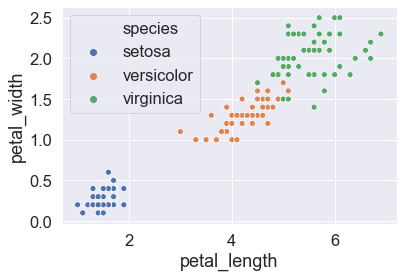

In [4]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
fig = plt.gcf()
fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [5]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [6]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
64,5.6,2.9,3.6,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa


In [7]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [8]:
decision_tree_model.predict_proba(four_random_rows[["petal_length", "petal_width"]])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

[Text(167.4, 199.32, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(136.96363636363637, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.83636363636364, 163.07999999999998, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(121.74545454545455, 126.83999999999999, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(60.872727272727275, 90.6, 'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(30.436363636363637, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 90.6, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(152.1818181818182, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 54.359999999999985, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(182.61818

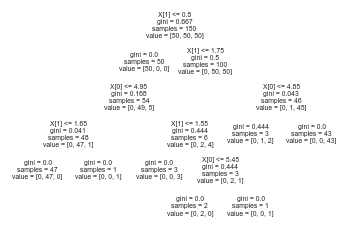

In [9]:
 tree.plot_tree(decision_tree_model) 

In [11]:
import graphviz 

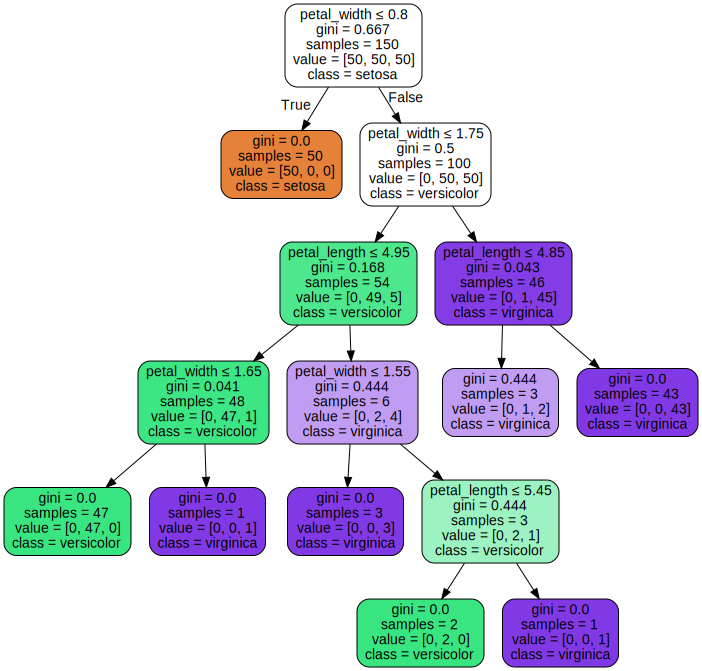

In [15]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="iris_tree")
graph

['setosa' 'versicolor' 'virginica']
[0 0 0 ... 2 2 2]


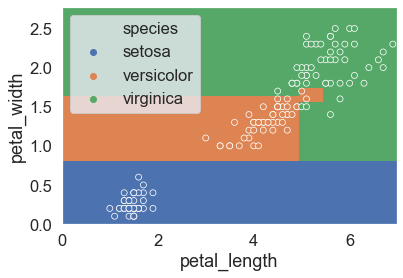

In [18]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
print(categories)
print(Z_int)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
fig = plt.gcf()
fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'none')
logistic_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.savefig("iris_decision_boundaries_logistic.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

In [ ]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

### Controlling Complexity

`sklearn` provides many different parameters that allow you to control the complexity of a Decision Tree.

In [ ]:
np.random.seed(23)

In [ ]:
decision_tree_min_dwg = tree.DecisionTreeClassifier(min_impurity_decrease = 0.1)
decision_tree_min_dwg = decision_tree_min_dwg.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [ ]:
dot_data = tree.export_graphviz(decision_tree_min_dwg, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_min_dwg.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.savefig("decision_tree_min_dwg.png", dpi=300, bbox_inches = "tight")

### Using Complexity Controls to Avoid Overfitting

Let's see an example where overfitting occurs. We'll start by splitting out data into a training and test set.

In [ ]:
np.random.seed(23)
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [ ]:
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
#plt.savefig("sepal_data_no_model.png", dpi=300, bbox_inches = "tight")

In [ ]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

Let's now fit a decision tree with no complexity controls.

In [ ]:
from sklearn import tree
sepal_tree_no_controls = tree.DecisionTreeClassifier()
sepal_tree_no_controls.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
plt.savefig("iris_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

In [ ]:
accuracy_score(train_iris_data["species"],
               sepal_tree_no_controls.predict(train_iris_data[["sepal_length", "sepal_width"]]))

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend = False)
plt.savefig("iris_test_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

In [ ]:
accuracy_score(test_iris_data["species"],
               sepal_tree_no_controls.predict(test_iris_data[["sepal_length", "sepal_width"]]))

In [ ]:
dot_data = tree.export_graphviz(sepal_tree_no_controls, out_file = None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}
mindwg_decision_tree = tree.DecisionTreeClassifier()
cv_model_finder = GridSearchCV(mindwg_decision_tree, parameters, cv=10)
cv_model_finder.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

In [ ]:
cv_model_finder.best_params_

In [ ]:
mindwg_decision_tree_with_best_params = cv_model_finder.best_estimator_
mindwg_decision_tree_with_best_params.predict([[4, 3.2]])

In [ ]:
sepal_tree_no_controls

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_tree_no_controls.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_test_decision_boundaries_sepal_data_no_controls.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = mindwg_decision_tree_with_best_params.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
plt.savefig("iris_test_decision_boundaries_sepal_data_best_mindwg.png", dpi=300, bbox_inches = "tight")

In [ ]:
dot_data = tree.export_graphviz(mindwg_decision_tree_with_best_params, out_file = None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
accuracy_score(test_iris_data["species"],
              mindwg_decision_tree_with_best_params.predict(
                  test_iris_data[["sepal_length", "sepal_width"]]))

In [ ]:
parameters = {'min_samples_split' : [2, 5, 10], 'max_depth':[4, 5, 6, None],
              'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1],
              'ccp_alpha': [0, 0.01, 0.02, 0.05]}
decision_tree_3hp = tree.DecisionTreeClassifier()
cv_model_finder_3hp = GridSearchCV(decision_tree_3hp, parameters, cv=10)
cv_model_finder_3hp.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                        train_iris_data["species"])

In [ ]:
cv_model_finder_3hp.best_params_

In [ ]:
best_3hp_tree = cv_model_finder_3hp.best_estimator_

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = best_3hp_tree.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
#plt.savefig("iris_test_decision_boundaries_sepal_data_best_3hp_tree.png", dpi=300, bbox_inches = "tight")

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(iris_data[["sepal_length", "sepal_width"]], iris_data["species"])

In [ ]:
iris_data[["sepal_length", "sepal_width"]].head(9)

In [ ]:
random_forest_model.predict_proba(iris_data[["sepal_length", "sepal_width"]])[0:10, :]

In [ ]:
random_forest_model.predict_proba([[4.4, 2.9]])

In [48]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
#plt.savefig("iris_decision_boundaries_random_forest_no_complexity_controls.png", dpi=300, bbox_inches = "tight")

In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1],
             'n_estimators': [50, 100, 200, 300]}
random_forest_model = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest_model, parameters, cv=10)
random_forest_cv.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [50]:
random_forest_cv.best_params_

{'min_impurity_decrease': 0.01, 'n_estimators': 200}

In [51]:
random_forest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
best_random_forest_model = random_forest_cv.best_estimator_

In [53]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = best_random_forest.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
#plt.savefig("iris_random_forest_decision_boundaries_mindwg_pt01.png", dpi=300, bbox_inches = "tight")

NameError: name 'best_random_forest' is not defined